In [1]:
import nltk
import re
from collections import Counter
from itertools import islice

## test corpus

In [2]:
test_corpus = []
with open('../data/test_v2.txt','rt') as file:
    for line in file:
        comma_pos = line.find(',')
        words = re.sub('"', '', line[comma_pos+1:]).lower()
#         words = re.sub('[0-9]',"#",words)
        test_corpus.append(nltk.word_tokenize(words))

## sentence's length

In [3]:
import matplotlib.pyplot as plt

In [4]:
sent_len_counter = Counter()
for step, sentence in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    sent_len_counter[len(sentence)] += 1
    
min_len = min(sent_len_counter.keys())
max_len = max(sent_len_counter.keys())
print(f'min sentence length: {min_len}')
print(f'max sentence length: {max_len}')

min sentence length: 0
max sentence length: 996


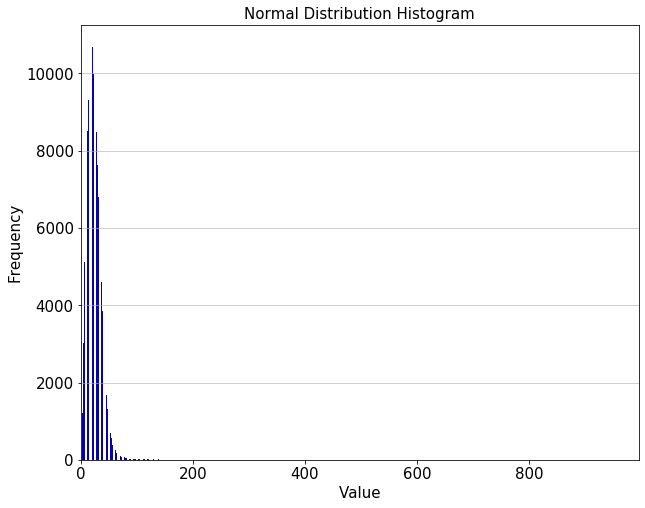

In [5]:
plt.figure(figsize=[10,8])

plt.bar(sent_len_counter.keys(), sent_len_counter.values(), width = 0.5, color='#0504aa')#, alpha=0.7)
plt.xlim(min_len, max_len)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

## ngrams frequency

In [6]:
unigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for token in line:
        unigram_counter[token] += 1

In [7]:
print(f'number of all unigram in test corpus: {len(unigram_counter)}')
unigram_counter.most_common(30)

number of all unigram in test corpus: 159740


[('the', 402020),
 (',', 342277),
 ('.', 310630),
 ('to', 178207),
 ('of', 168734),
 ('a', 160164),
 ('and', 158065),
 ('in', 144187),
 ('that', 67490),
 ("'s", 66412),
 ('for', 65828),
 ('on', 57408),
 ('is', 54571),
 ('with', 45371),
 ('was', 45145),
 ('it', 44682),
 ('said', 42003),
 ('as', 39376),
 ('he', 38611),
 ('at', 37377),
 ('by', 33483),
 ('from', 32106),
 ('be', 30163),
 ('his', 29807),
 ('have', 29134),
 ('has', 28797),
 ('but', 27430),
 ('are', 27330),
 ('an', 24998),
 ('not', 23329)]

In [8]:
def get_windows(seq, n, need_sorted=False):
    it = iter(seq)
    result = list(islice(it, n))
    if len(result) == n:
        if need_sorted:
            result = sorted(result)
        yield tuple(result)
    for elem in it:
        result = result[1:] + [elem,]
        if need_sorted:
            result = sorted(result)
        yield tuple(result)

In [9]:
bigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for bigram in list(get_windows(line, 2)):
        bigram_counter[bigram] += 1

In [10]:
# test version
bigram_counter2 = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    bigram_counter2.update(get_windows(line, 2))

In [11]:
print(f'number of all bigram in test corpus: {len(bigram_counter)}')
bigram_counter.most_common(30)

number of all bigram in test corpus: 1877243


[(('of', 'the'), 38841),
 (('in', 'the'), 35334),
 ((',', 'the'), 24234),
 ((',', 'and'), 18767),
 (('to', 'the'), 16578),
 (('on', 'the'), 13130),
 (('for', 'the'), 13090),
 ((',', 'a'), 11441),
 (('said', '.'), 10755),
 (('at', 'the'), 10724),
 (('and', 'the'), 10330),
 ((',', 'but'), 10170),
 (('in', 'a'), 9837),
 ((',', 'which'), 9425),
 (('to', 'be'), 8911),
 ((',', 'said'), 8653),
 (('with', 'the'), 7869),
 ((',', 'he'), 7696),
 ((',', 'who'), 7676),
 (('from', 'the'), 7582),
 (('that', 'the'), 7528),
 (('of', 'a'), 7326),
 (('by', 'the'), 7047),
 (('as', 'a'), 5684),
 (('with', 'a'), 5287),
 (('to', 'a'), 5260),
 (('more', 'than'), 5259),
 (('for', 'a'), 5172),
 (('has', 'been'), 5172),
 (('will', 'be'), 5086)]

In [12]:
trigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for trigram in list(get_windows(line, 3)):
        trigram_counter[trigram] += 1

In [13]:
print(f'number of all trigram in test corpus: {len(trigram_counter)}')
trigram_counter.most_common(30)

number of all trigram in test corpus: 4583562


[((',', 'he', 'said'), 3088),
 (('one', 'of', 'the'), 2580),
 (('he', 'said', '.'), 2531),
 ((',', 'according', 'to'), 2346),
 (('(', 'ap', ')'), 2275),
 (('the', 'united', 'states'), 2223),
 ((',', 'and', 'the'), 1883),
 (('ap', ')', '-'), 1788),
 (('as', 'well', 'as'), 1436),
 (('the', 'end', 'of'), 1296),
 (('upi', ')', '--'), 1289),
 (('(', 'upi', ')'), 1275),
 ((',', 'which', 'is'), 1172),
 (('the', 'world', "'s"), 1111),
 ((',', 'but', 'the'), 1102),
 (('(', 'reuters', ')'), 1069),
 (('reuters', ')', '-'), 1047),
 (('according', 'to', 'the'), 1013),
 (('some', 'of', 'the'), 956),
 (('in', 'the', 'first'), 942),
 ((',', 'said', 'the'), 908),
 (('part', 'of', 'the'), 895),
 ((',', 'she', 'said'), 879),
 (('the', 'company', "'s"), 875),
 (('the', 'first', 'time'), 872),
 (('for', 'the', 'first'), 854),
 (('the', 'country', "'s"), 844),
 (('out', 'of', 'the'), 822),
 (('the', 'new', 'york'), 804),
 ((',', 'however', ','), 800)]

## distribution

In [14]:
from collections import defaultdict

In [15]:
def get_windows(seq, n):
    it = iter(seq)
    result = list(islice(it, n))
    if len(result) == n:
        output = tuple(result[:n-1]), result[-1]
        yield output
    for elem in it:
        result = result[1:] + [elem,]
        output = tuple(result[:n-1]), result[-1]
        yield output

In [16]:
unigram_dist = defaultdict(lambda: 0)
bigram_dist = defaultdict(lambda: 0)
trigram_dist = defaultdict(lambda: 0)

# unigram distrubution counting
n_unigram = len(unigram_counter)
for word in unigram_counter:
    unigram_dist[word] /= n_unigram
    
# bigram distrubution counting
for bigram in bigram_counter:
    bigram_dist[bigram] = bigram_counter[bigram] / unigram_counter[bigram[0]]
    
# trigram distrubution counting
for trigram in trigram_counter:
    trigram_dist[trigram] = trigram_counter[bigram] / bigram_counter[trigram[:2]]

## Pos-tag ngrams

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\persi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
unigram_tags_counter = Counter()
unigram_tags_counter.update([tag for gram, tag in nltk.pos_tag(unigram_counter.keys())])

In [19]:
print(f'number of all unigram tags in test corpus: {len(unigram_tags_counter)}')
unigram_tags_counter.most_common(30)

number of all unigram tags in test corpus: 40


[('NN', 53225),
 ('JJ', 50662),
 ('NNS', 14723),
 ('CD', 12280),
 ('VBD', 6559),
 ('VBP', 5942),
 ('VBG', 4677),
 ('RB', 3264),
 ('VBZ', 2323),
 ('IN', 2006),
 ('VBN', 1245),
 ('VB', 560),
 ('NNP', 513),
 ('JJR', 423),
 ('FW', 269),
 ('JJS', 222),
 ('POS', 208),
 ('RBR', 163),
 ('$', 88),
 ('MD', 73),
 ('RBS', 73),
 ('DT', 46),
 ('CC', 44),
 ('RP', 30),
 ('WP', 28),
 ('PRP', 25),
 ('WRB', 23),
 ('PRP$', 13),
 ('WDT', 8),
 ('EX', 6)]

In [20]:
bigram_tags = nltk.pos_tag_sents(bigram_counter.keys())
bigram_tags_counter = Counter()
for step, bigram_tag in enumerate(bigram_tags):
    bigram_tags_counter[tuple([tag for gram, tag in bigram_tag])] += 1

In [21]:
print(f'number of all bigram tags in test corpus: {len(bigram_tags_counter)}')
bigram_tags_counter.most_common(30)

number of all bigram tags in test corpus: 1208


[(('NN', 'NN'), 193955),
 (('JJ', 'NN'), 136148),
 (('NN', 'IN'), 75134),
 (('NN', 'NNS'), 70390),
 (('NN', 'VBD'), 65772),
 (('IN', 'NN'), 63974),
 (('DT', 'NN'), 52210),
 (('JJ', 'NNS'), 49884),
 (('NN', ','), 35107),
 (('NNS', 'VBP'), 29989),
 (('NNS', 'IN'), 29883),
 (('NNS', 'VBD'), 29113),
 (('NN', '.'), 25553),
 (('VBN', 'NN'), 23694),
 (('VBG', 'NN'), 23113),
 (('NN', 'CC'), 22618),
 (('IN', 'NNS'), 20246),
 (('NN', 'VBZ'), 19472),
 (('CD', 'NN'), 18861),
 (('NN', 'RB'), 17712),
 (('NNS', 'NN'), 17522),
 ((',', 'NN'), 17349),
 (('IN', 'JJ'), 16644),
 (('CD', 'NNS'), 15732),
 (('CC', 'NN'), 15618),
 (('DT', 'JJ'), 15414),
 (('RB', 'NN'), 15192),
 (('PRP$', 'NN'), 15113),
 (('RB', 'JJ'), 13417),
 (('VBN', 'IN'), 13344)]

In [24]:
trigram_tags = nltk.pos_tag_sents(trigram_counter.keys())
trigram_tags_counter = Counter()
for step, trigram_tag in enumerate(trigram_tags):
    trigram_tags_counter[tuple([tag for gram, tag in trigram_tag])] += 1

In [25]:
print(f'number of all trigram tags in test corpus: {len(trigram_tags_counter)}')
trigram_tags_counter.most_common(30)

number of all trigram tags in test corpus: 22403


[(('NN', 'IN', 'NN'), 85264),
 (('DT', 'JJ', 'NN'), 78892),
 (('IN', 'DT', 'NN'), 70905),
 (('JJ', 'NN', 'IN'), 53143),
 (('DT', 'NN', 'NN'), 50226),
 (('JJ', 'NN', 'NN'), 48218),
 (('NN', 'IN', 'DT'), 46825),
 (('NN', 'NN', 'NN'), 43734),
 (('NN', ',', 'NN'), 37009),
 (('NN', 'NN', ','), 35081),
 (('NN', 'NN', 'IN'), 33765),
 (('DT', 'NN', 'IN'), 30424),
 (('NNS', 'IN', 'NN'), 30133),
 (('NN', 'CC', 'NN'), 29903),
 (('NN', 'TO', 'VB'), 29463),
 (('IN', 'JJ', 'NN'), 29137),
 (('NN', 'POS', 'NN'), 25745),
 (('JJ', 'NN', '.'), 24108),
 (('NN', 'IN', 'JJ'), 23970),
 (('JJ', 'NN', ','), 23153),
 (('VB', 'DT', 'NN'), 22933),
 (('JJ', 'NNS', 'IN'), 22394),
 (('NN', 'NN', '.'), 22143),
 (('IN', 'NN', 'NN'), 21818),
 (('NN', 'NN', 'VBD'), 21645),
 (('IN', 'JJ', 'NNS'), 20163),
 (('IN', 'DT', 'JJ'), 19805),
 (('NN', 'IN', 'NNS'), 19011),
 (('NNS', 'IN', 'DT'), 18812),
 (('JJ', 'NN', 'NNS'), 18408)]